<a href="https://colab.research.google.com/github/IA-DAMA/NeuralNetwork/blob/main/Neural_Network_Text_Classification(Py_tf).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network for text classification


1.   Implementing feedfoward Neural Network with numerical data
2.   Tensorflow with text classification
3.   Figure it out whether winery review based on the review it self is lower or higher tier


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [2]:
df = pd.read_csv("wine-reviews.csv", usecols=['country', 'description', 'points', 'price', 'variety', 'winery'], encoding='utf-8')

In [3]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [4]:
df = df.dropna(subset=["description", "points"])

In [5]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


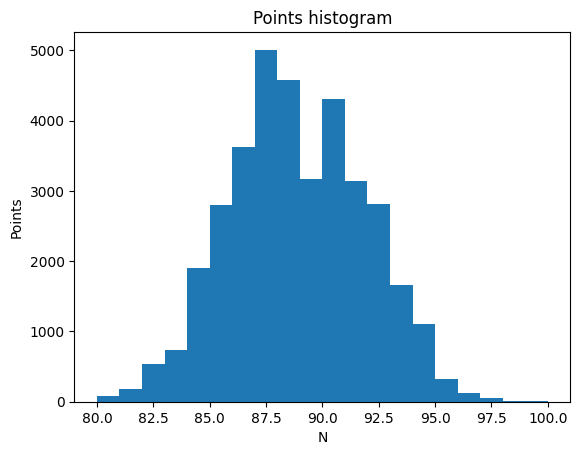

In [6]:
plt.hist(df.points, bins=20)
plt.title("Points histogram")
plt.xlabel("N")
plt.ylabel("Points")

plt.show()

*Down bellow you can also check the output from the cell df cell bellow.*

In [7]:
#df["label"] = (df.points >= 90).astype(int)
#df = df[["description", "points", "label"]]

In [8]:
#df.head()

In [9]:
#df.tail()

**Let's split out our train, val, and test**

In [10]:
df["label"] = (df.points >= 90).astype(int)
df = df[["description", "label"]]

In [11]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))]) #10%, 80%, 90% for train, val, test (10% is enough to generalize using a huge dataframe)

In [12]:
len(train), len(val), len(test)

(28935, 3617, 3617)

#Creating an input pipeline using tf.data

*This function converts each training, validation, and test set DataFrame into a tf.data.Dataset*

*for more: https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers*

In [13]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df["description"]              #{key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)  #AUTOTUNE "optmizes..."                 #Change the following value "batch_size"
  return ds

In [14]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [15]:
#list(train_data)[0]     # Run the previous code so the Output will be:



#(<tf.Tensor: shape=(1024,), dtype=string, numpy=
# array([b'Dense and concentrated, this wine is ultra smooth in texture, offering an abundance of red and black cherry, dark plum and baking spice aromas. One of the few Pinots grown in Marin County, it has great depth and a memorable flavor profile that lingers long into the finish.',
#        b"A simple, sweet wine, with sugary cherry, chocolate and anise flavors. There's a curious, disagreeable charred taste, like a cigarette butt.",
#        b"This bio wine comes from just over one acre of vines in the appellation's best iron-red terroir. It is ripe and creamy, full of smooth apple-pur\xc3\xa9e fruitiness. A good squeeze of lemon juice gives the wine its crisp aftertaste. Drink now.",
#        ...,
#        b'An unusual and wonderful blend of grapes has produced a simple and fruity wine. Touches of caramel broaden the crisp red berry fruits and bright acidity. It should be drunk now.',
#        b"Raspberry and green bell pepper aromas set the scene for blackberry, cassis, geranium leaf and smoke flavors in this wine. It's full bodied, with velvety tannins and a savory finish.",
#        b'This is a rich soft wine full of tannins that have merged with the generous red-berry fruits. Colored by the unusual blend of Alicante Bouschet with Petit Verdot, it is smoothly textured and ready to drink.'],
#       dtype=object)>,
# <tf.Tensor: shape=(1024,), dtype=int64, numpy=array([1, 0, 0, ..., 0, 0, 0])>)

#Embedding Model

In [41]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

*Here we are going to project into a len 50 vector cointaing only numbers, basically, trasnforming text in a vector of numbers*

In [42]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 4.3361712e-01, -1.5109478e-01, -4.1771997e-02, ...,
         1.6864826e-01, -1.0286436e-01, -1.4589529e-02],
       [ 1.6825025e-01, -2.1888886e-01, -1.5772498e-01, ...,
         4.5831807e-02, -2.6150462e-01, -2.2873826e-01],
       [ 7.9383053e-02, -1.9614093e-01, -3.9816719e-01, ...,
        -4.9258317e-03, -2.2278371e-01,  7.9831608e-02],
       ...,
       [ 4.7141305e-01, -3.0411732e-01,  1.9335356e-01, ...,
        -4.7581870e-02, -2.7784240e-01, -1.9106030e-01],
       [ 1.9299483e-01, -2.7018204e-01,  9.5329054e-02, ...,
         6.1161250e-02, -3.1234741e-01,  5.5496179e-02],
       [ 2.2496697e-01, -1.5135497e-01,  3.9412157e-04, ...,
        -1.6581273e-01, -7.9370692e-02,  4.7501284e-03]], dtype=float32)>

#Building our model

*Dropout means every once i a while you select fews nodes that aren't "working"*

In [43]:
model = tf.keras.Sequential()
model.add(hub_layer) #     It's trasnfomring text in a numeric value
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4)) #We added this line to this cell just right after model fitting
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4)) ##We added this line to this cell just right after model fitting
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))


*Now we are going to compile the model, and also be doing a "binary classification"*

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Running Adam for optimmizing
              loss=tf.keras.losses.BinaryCrossentropy(), # For "Loss" we are going to use "BinaryCrossentropy"
              metrics=['accuracy']) # For metrics adding "accuracy"

*Now we are going to try to evaluate the "untrained model" on  "training data"*

In [45]:
model.evaluate(train_data)

29/29 [==============================] - 1s 20ms/step - loss: 0.6982 - accuracy: 0.3932


[0.6981855034828186, 0.3932262063026428]

*Now we are going to do the same for "validation data"*

In [46]:
model.evaluate(valid_data)

4/4 [==============================] - 0s 15ms/step - loss: 0.6983 - accuracy: 0.3929


[0.698291540145874, 0.3928670287132263]

*After bad results, we are going to try "model.fit". After changing parameters and running it again we mihgt find higher accuracy but it generalizes*




In [47]:
history = model.fit(train_data, epochs=5, validation_data=valid_data) #Instead of "Epoch=10", now it's 5

Epoch 1/5
29/29 [==============================] - 53s 2s/step - loss: 0.6847 - accuracy: 0.5619 - val_loss: 0.6629 - val_accuracy: 0.6287
Epoch 2/5
29/29 [==============================] - 50s 2s/step - loss: 0.6505 - accuracy: 0.6318 - val_loss: 0.6131 - val_accuracy: 0.6505
Epoch 3/5
29/29 [==============================] - 51s 2s/step - loss: 0.5958 - accuracy: 0.6801 - val_loss: 0.5349 - val_accuracy: 0.7636
Epoch 4/5
29/29 [==============================] - 49s 2s/step - loss: 0.5178 - accuracy: 0.7509 - val_loss: 0.4597 - val_accuracy: 0.7907
Epoch 5/5
29/29 [==============================] - 52s 2s/step - loss: 0.4505 - accuracy: 0.7984 - val_loss: 0.4148 - val_accuracy: 0.8087


*What we have just seen is a classic example of "Overfitting". It happens cuz our train is lerning really well but it generalizes really poorly*

In [51]:
model.evaluate(test_data)

4/4 [==============================] - 2s 375ms/step - loss: 0.4240 - accuracy: 0.8051


[0.42402225732803345, 0.8050870895385742]

*The precision is 83% above*

#LSTM

*1) Creating a sort of encoder for our text*

In [53]:
encoder = tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label: text))

*2) Let's check out our vocabulary/ The array will present unknown tokens*

In [54]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'and', 'the', 'a', 'of', 'with', 'this', 'is', 'wine',
       'in', 'flavors', 'to', 'it', 'its', 'fruit', 'on', 'aromas',
       'palate', 'that'], dtype='<U17')

#Building our model againm but now using LSTM

In [58]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=32,
        mask_zero=True
    ),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [59]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Running Adam for optimmizing
              loss=tf.keras.losses.BinaryCrossentropy(), # For "Loss" we are going to use "BinaryCrossentropy"
              metrics=['accuracy']) # For metrics adding "accuracy"

*Let's evaluate it again*

In [60]:
model.evaluate(train_data)
model.evaluate(valid_data)

4/4 [==============================] - 1s 154ms/step - loss: 0.6931 - accuracy: 0.4954


[0.6931130886077881, 0.49543821811676025]

*Now let's train our model*

In [61]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
29/29 [==============================] - 24s 653ms/step - loss: 0.6702 - accuracy: 0.6167 - val_loss: 0.6391 - val_accuracy: 0.6287
Epoch 2/5
29/29 [==============================] - 16s 546ms/step - loss: 0.5999 - accuracy: 0.6551 - val_loss: 0.5098 - val_accuracy: 0.7747
Epoch 3/5
29/29 [==============================] - 16s 544ms/step - loss: 0.4646 - accuracy: 0.7914 - val_loss: 0.4083 - val_accuracy: 0.8186
Epoch 4/5
29/29 [==============================] - 16s 536ms/step - loss: 0.3819 - accuracy: 0.8294 - val_loss: 0.3619 - val_accuracy: 0.8388
Epoch 5/5
29/29 [==============================] - 21s 718ms/step - loss: 0.3518 - accuracy: 0.8464 - val_loss: 0.3592 - val_accuracy: 0.8385


*Finally, we can evaluate our final model (Our test_data)*

In [62]:
model.evaluate(test_data)

4/4 [==============================] - 1s 162ms/step - loss: 0.3731 - accuracy: 0.8258


[0.3731269836425781, 0.8258225321769714]

*Let's plot it to better look at*

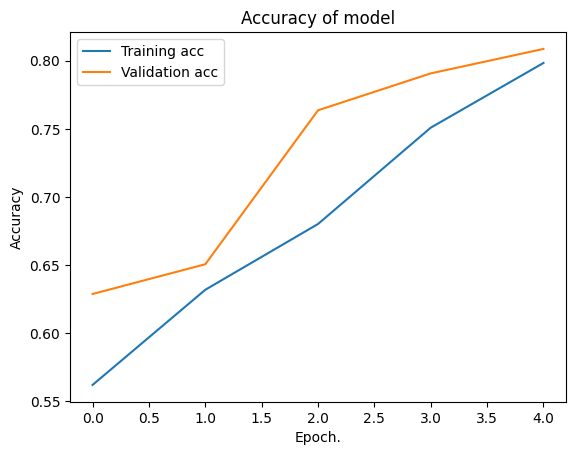

In [48]:
#plt.plot(history.history['accuracy'], label="Training acc")             #Setting labels
#plt.plot(history.history['val_accuracy'], label="Validation acc")
#plt.title("Accuracy of model")
#plt.ylabel("Accuracy")
#plt.xlabel("Epoch.")
#plt.legend()
#plt.show()

*Now let's plot loss*

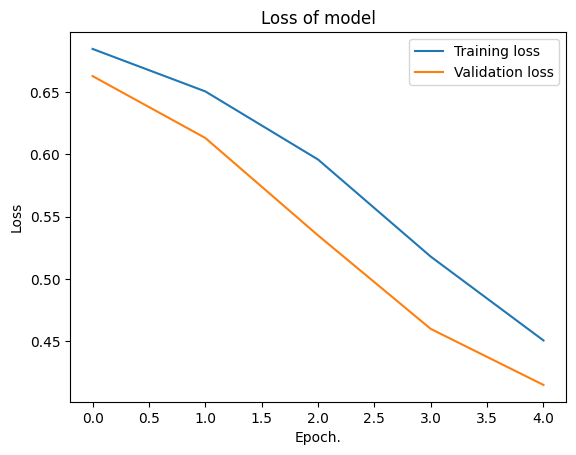

In [49]:
#plt.plot(history.history['loss'], label="Training loss")
#plt.plot(history.history['val_loss'], label="Validation loss")
#plt.title("Loss of model")
#plt.ylabel("Loss")
#plt.xlabel("Epoch.")
#plt.legend()
#plt.show()

*How do we fix it? By changing through adding "model.add(tf.keras.layers.Dropout(0.4))" lines to our model cell high up above*

*After fitting model, evaluate test_data*

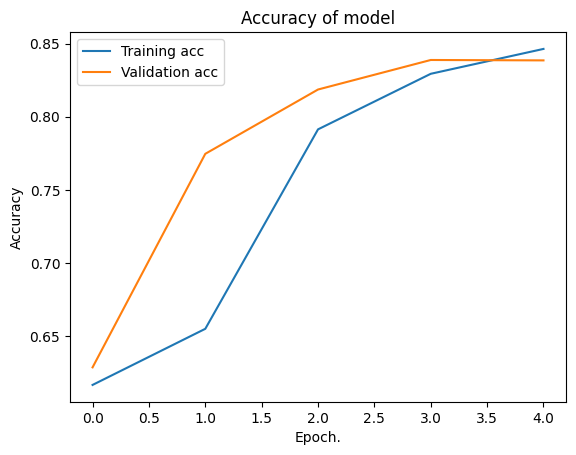

In [63]:
plt.plot(history.history['accuracy'], label="Training acc")             #Setting labels
plt.plot(history.history['val_accuracy'], label="Validation acc")
plt.title("Accuracy of model")
plt.ylabel("Accuracy")
plt.xlabel("Epoch.")
plt.legend()
plt.show()

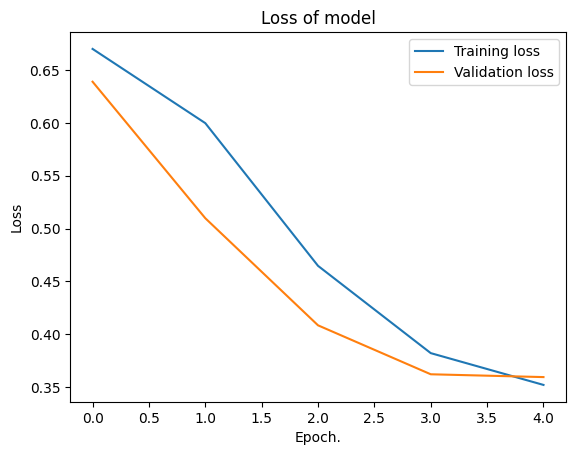

In [64]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title("Loss of model")
plt.ylabel("Loss")
plt.xlabel("Epoch.")
plt.legend()
plt.show()